In [41]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.spatial import Voronoi, voronoi_plot_2d

# Voronoi diagram

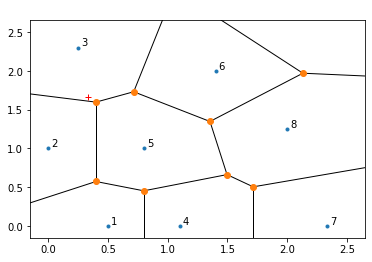

In [66]:
L = 1000.0 # Length of emitter in nm

# Note: Points don't have to be within the emitter area.
points = np.array([[0.5, 0], [0, 1], [0.25, 2.3], [1.1, 0], [0.8, 1], [1.4, 2],
                   [2.33, 0], [2, 1.25], [2.1, 2.7]])

points = np.append(points, [[9999,9999], [-9999,9999], [9999,-9999], [-9999,-9999]], axis = 0)

work_fun = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])

test_point = np.array([1/3, 1+2/3])

vor = Voronoi(points)
fig = voronoi_plot_2d(vor)

for p, s in zip(points, work_fun):
    plt.annotate(str(s), p+0.025)
    
plt.plot(test_point[0], test_point[1], '+r')
plt.xlim([-0.15, 2.65])
plt.ylim([-0.15, 2.65])

plt.show()

Above the Voronoi diagram is ploted along with the test point (+) where we want to find the value of the work function.

# Algorithm to find the work function value at some point
We find the work function by looping over all the points and finding which point is closest to out test point.

In [43]:
# Define a function to calculate the distance between two points
# We could also use some thing like Manhattan distance.
def Calc_Distance(p1, p2):
    return np.sqrt( (p1[0] - p2[0])**2 + (p1[1] - p2[1])**2 )

k = -1 # The closest point
d = 9.9E10 # Distance to the closest point we have found so far

for i in range(len(points)):
    p = points[i]
    d_p = (p[0] - test_point[0])**2 + (p[1] - test_point[1])**2
    
    if (d_p < d): # Check if we found a closer point
        k = i
        d = d_p
        
print(points[k])
print(work_fun[k])

[0.25 2.3 ]
3


In [44]:
d_p = np.zeros(len(points))

for i in range(len(points)):
    p = points[i]
    d_p[i] = np.sqrt( (p[0] - test_point[0])**2 + (p[1] - test_point[1])**2 )
    
print(points[np.argmin(d_p)])
print(work_fun[np.argmin(d_p)])

[0.25 2.3 ]
3


In [72]:
vor.vertices

array([[ 0.00000000e+00, -9.99899999e+03],
       [ 4.14779322e-13,  1.00017001e+04],
       [-1.77651782e+03,  8.22432928e+03],
       [ 1.00013303e+04,  0.00000000e+00],
       [ 9.21500391e+03,  7.86143129e+02],
       [ 8.00000000e-01, -9.99820003e+03],
       [ 1.71500000e+00, -9.99728513e+03],
       [-6.66602777e+03, -3.33263888e+03],
       [-9.99899995e+03,  0.00000000e+00],
       [-8.38498939e+03,  1.61417200e+03],
       [ 6.19565452e+00,  1.68909279e+00],
       [ 1.71500000e+00,  5.06200000e-01],
       [ 1.05775862e+00,  3.04224138e+00],
       [ 2.13055556e+00,  1.96944444e+00],
       [ 1.49607843e+00,  6.63823529e-01],
       [ 8.00000000e-01,  4.55000000e-01],
       [ 4.00000000e-01,  5.75000000e-01],
       [ 1.35357143e+00,  1.34785714e+00],
       [ 4.00000000e-01,  1.59711538e+00],
       [ 7.15601504e-01,  1.73063910e+00]])

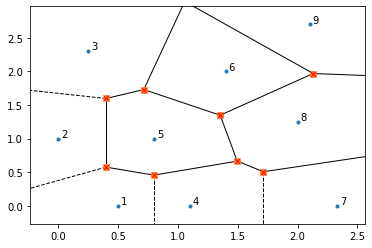

In [46]:
vor = Voronoi(points)
fig = voronoi_plot_2d(vor)

for p, s in zip(points, work_fun):
    plt.annotate(str(s), p+0.025)
    
for p in vor.vertices:
    plt.plot(p[0], p[1], 'xr')
    
    
#plt.xlim([-0.25, 6.25])
#plt.ylim([-0.25, 6.25])
plt.show()

In [47]:
for i in vor.regions[7]:
    if (i > -1):
        print(vor.vertices[i])
    else:
        print('Point outside')

[0.8   0.455]
Point outside
[0.4   0.575]


In [48]:
vor.point_region

array([7, 8, 9, 4, 3, 6, 2, 5, 1])

In [49]:
vor.ridge_vertices

[[-1, 0],
 [-1, 1],
 [0, 2],
 [1, 2],
 [0, 3],
 [-1, 3],
 [4, 7],
 [4, 5],
 [5, 9],
 [6, 7],
 [6, 8],
 [8, 9],
 [3, 4],
 [-1, 7],
 [2, 5],
 [1, 9],
 [-1, 6],
 [-1, 8]]

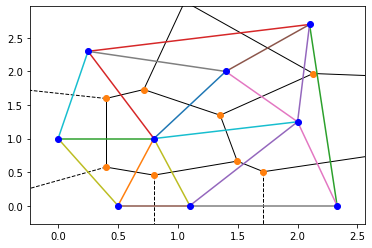

In [53]:
fig = voronoi_plot_2d(vor)

for p in vor.ridge_points:
    p1 = vor.points[p[0]]
    p2 = vor.points[p[1]]
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]])
    
for p in vor.points:
    plt.plot(p[0], p[1], 'ob')
    
plt.show()

In [56]:
# From: https://stackoverflow.com/a/20678647
def voronoi_finite_polygons_2d(vor, radius=None):
    """
    Reconstruct infinite voronoi regions in a 2D diagram to finite
    regions.

    Parameters
    ----------
    vor : Voronoi
        Input diagram
    radius : float, optional
        Distance to 'points at infinity'.

    Returns
    -------
    regions : list of tuples
        Indices of vertices in each revised Voronoi regions.
    vertices : list of tuples
        Coordinates for revised Voronoi vertices. Same as coordinates
        of input vertices, with 'points at infinity' appended to the
        end.

    """

    if vor.points.shape[1] != 2:
        raise ValueError("Requires 2D input")

    new_regions = []
    new_vertices = vor.vertices.tolist()

    center = vor.points.mean(axis=0)
    if radius is None:
        radius = vor.points.ptp().max()

    # Construct a map containing all ridges for a given point
    all_ridges = {}
    for (p1, p2), (v1, v2) in zip(vor.ridge_points, vor.ridge_vertices):
        all_ridges.setdefault(p1, []).append((p2, v1, v2))
        all_ridges.setdefault(p2, []).append((p1, v1, v2))

    # Reconstruct infinite regions
    for p1, region in enumerate(vor.point_region):
        vertices = vor.regions[region]

        if all(v >= 0 for v in vertices):
            # finite region
            new_regions.append(vertices)
            continue

        # reconstruct a non-finite region
        ridges = all_ridges[p1]
        new_region = [v for v in vertices if v >= 0]

        for p2, v1, v2 in ridges:
            if v2 < 0:
                v1, v2 = v2, v1
            if v1 >= 0:
                # finite ridge: already in the region
                continue

            # Compute the missing endpoint of an infinite ridge

            t = vor.points[p2] - vor.points[p1] # tangent
            t /= np.linalg.norm(t)
            n = np.array([-t[1], t[0]])  # normal

            midpoint = vor.points[[p1, p2]].mean(axis=0)
            direction = np.sign(np.dot(midpoint - center, n)) * n
            far_point = vor.vertices[v2] + direction * radius

            new_region.append(len(new_vertices))
            new_vertices.append(far_point.tolist())

        # sort region counterclockwise
        vs = np.asarray([new_vertices[v] for v in new_region])
        c = vs.mean(axis=0)
        angles = np.arctan2(vs[:,1] - c[1], vs[:,0] - c[0])
        new_region = np.array(new_region)[np.argsort(angles)]

        # finish
        new_regions.append(new_region.tolist())

    return new_regions, np.asarray(new_vertices)

In [74]:
regions, ver = voronoi_finite_polygons_2d(vor)

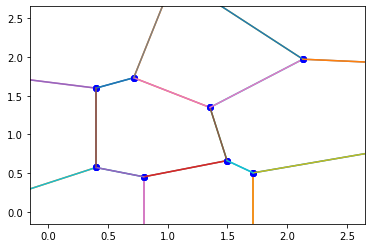

In [86]:
for r in regions:
    x = []
    y = []
    for i in r:
        x.append(ver[i][0])
        y.append(ver[i][1])
        plt.plot(ver[i][0], ver[i][1], 'ob')
        
    for i in range(0, len(x)):
        plt.plot([x[i], x[i-1]], [y[i], y[i-1]])
        
plt.xlim([-0.15, 2.65])
plt.ylim([-0.15, 2.65])
plt.show()